In [1]:
import pickle
import tensorflow as tf

A PKL file is a file created by pickle, a Python module that enabless objects to be serialized to files on disk and deserialized back into the program at runtime. It contains a byte stream that represents the objects.

In [2]:
with open('raw_data.pkl', 'rb') as raw_data:
    audio_data = pickle.load(raw_data)

In [3]:
type(audio_data)

list

In [4]:
len(audio_data)

2

In [5]:
audio_data

[array([[ 2.63387978e-01,  3.14395577e-01,  3.71339262e-01, ...,
          1.02218889e-01, -6.74791634e-02,  5.09077050e-02],
        [-1.28155397e-02, -7.20346486e-03, -7.41837621e-02, ...,
         -4.64885920e-01, -4.41945553e-01, -4.15928662e-01],
        [-1.35475339e-03, -9.98196378e-03, -9.75770317e-03, ...,
         -6.09248340e-01, -6.09835744e-01, -5.67394316e-01],
        ...,
        [ 1.28485905e-02,  8.50672740e-03,  1.25403069e-02, ...,
          6.80150166e-02,  9.86967012e-02,  8.80648866e-02],
        [ 2.31599316e-01,  1.92585319e-01,  2.26318061e-01, ...,
         -9.95363574e-03, -1.75106488e-02, -1.09797884e-02],
        [ 3.52538959e-03,  2.57717737e-04, -8.47308140e-04, ...,
         -3.96898650e-02,  6.00289926e-02, -5.62929772e-02]], dtype=float32),
 array([   1,    1,    1, ..., 1013, 1013, 1013])]

In [ ]:
#pip install librosa

In [6]:
import librosa # for audio

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms

In [8]:
ms.use('seaborn-muted')

In [9]:
%matplotlib inline

In [10]:
import librosa.display # for visualization 

In [11]:
import IPython.display as ipd # to play audio file

In [12]:
type(audio_data)

list

In [13]:
str(audio_data[1])

'[   1    1    1 ... 1013 1013 1013]'

In [14]:
type(audio_data[1])

numpy.ndarray

In [15]:
len(audio_data[0])

9600

In [16]:
audio_data[0][1]

array([-0.01281554, -0.00720346, -0.07418376, ..., -0.46488592,
       -0.44194555, -0.41592866], dtype=float32)

In [17]:
from scipy.io.wavfile import write

data = np.random.uniform(-1,1,44100) # 44100 random samples between -1 and 1
scaled = np.int16(data/np.max(np.abs(data)) * 32767)
print(data)
print(scaled)
write('test_1.wav', 44100, scaled)


In [18]:
import scipy

In [19]:
labels = np.unique(audio_data[1], return_counts= True)

In [21]:
labels

(array([   1,    2,    3,    4,    6,    7,    8,    9,   10,   11,   12,
          13,   15,   16,   18,   19,   20,   21,   22,   23,   24,   25,
          27,   29,   30,   31,   32,   36,   37,   38,   39,   40,   42,
          43,   46,   47,   48,   49,   57,   58,   61,   62,   63,   64,
          66,   68,   74,   75,   77,   78,   79,   80,   81,   82,   83,
          84,   85,   86,   87,   88,   89,   90,   92,   93,   94,   95,
          97,   98,  100,  101,  102,  103,  106,  107,  108,  109,  110,
         112,  113,  120,  124,  125,  127,  128,  129,  130,  131,  133,
         134,  137,  138,  139,  140,  141,  143,  145,  147,  148,  149,
         151,  152,  153,  154,  155,  157,  158,  161,  162,  163,  165,
         167,  168,  170,  171,  172,  173,  174,  175,  178,  179,  181,
         182,  183,  185,  186,  188,  189,  190,  192,  193,  194,  195,
         196,  198,  201,  202,  204,  208,  209,  210,  212,  213,  214,
         215,  216,  217,  220,  221, 

In [22]:
len(labels[0])

600

In [23]:
# we have 600 unique IDs
#Each unique ID has 16 audio instances
#That leaves us with 9600 total instances

In [24]:
#Creating a folder in the working directory to store the audio files
import os

In [25]:
cwd = os.getcwd()
new_folder = "audio_dataset"
folder = os.path.join(cwd, new_folder)
os.makedirs(folder)

In [26]:
print(folder)

C:\Users\Goutham Indiran\Deep Learning\Group_Project\audio_dataset


In [27]:
for i in range(24):
    scipy.io.wavfile.write(str(folder)+"\\audio_"+str(i+1)+".wav", 10000, audio_data[0][i])
    

In [28]:
for filename in os.listdir(folder):
    play = ipd.Audio(str(folder)+"\\"+str(filename))
play

In [32]:
ipd.Audio(str(folder)+"\\audio_9.wav")

In [ ]:
# Find a way to extract the frequency from the audio

The human voice normally spans a frequency range from about 100Hz to 8kHz.The lowest
frequency of any voice signal is called the Fundamental Frequency. The average fundamental
frequency for a male voice is 125Hz, and for a female voice it is 200Hz. When speaking, consonants
take up space between 2kHz and 5kHz. These sounds pass quickly and can help make speech more
intelligible. Similarly, vowel sounds are most prominent between 500Hz and 2kHz.

In [ ]:
audio_path_1 = str(folder)+"\\audio_20.wav"
x , sr = librosa.load(audio_path_1)
print(x)
print(sr)
print(audio_path_1)
ipd.Audio(audio_path_1)

The human voice normally spans a frequency range from about
- 100Hz to 8000Hz

The average fundamental frequency(lowest
frequency of any voice signal) for 
- a male voice is 125Hz
- a female voice it is 200Hz

When speaking, 
consonants (These sounds pass quickly and can help make speech more
intelligible)
- 2000Hz and 5000Hz

vowel sounds
- 500Hz and 2000Hz

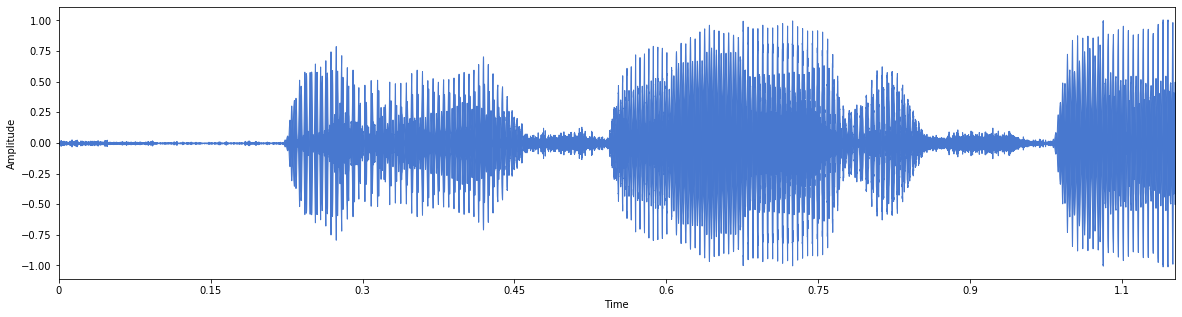

In [41]:
audio_path_9 = str(folder)+"\\audio_9.wav"
y , sr = librosa.load(audio_path_9)
# y - sample amplitude and sr- sampling rate
plt.figure(figsize=(20, 5))
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
librosa.display.waveplot(y, sr=sr)
#we have the plot the amplitude envelope of a waveform.

# time-domain representation of a given signal

#loudness (amplitude) of sound wave changing with time. Here amplitude = 0 represents silence

#These amplitudes are not very informative, as they only talk about the loudness of audio recording


To better understand the audio signal, it is necessary to transform it into the frequency-domain. 
The frequency-domain representation of a signal tells us what different 
frequencies are present in the signal. 

- Fourier Transform is a mathematical  concept that can convert a continuous signal from time-domain to frequency-domain

- https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520


- Inverse Fourier Transform :  is just the opposite of the Fourier Transform. It takes the frequency-domain representation of a given signal as input and does mathematically synthesize the original signal.

- Fast Fourier Transform: FT considers a continuous signal while FFT takes a discrete signal as input

- We have a sequence of amplitudes that were sampled from a continuous audio signal. DFT or FFT algorithm can convert this time-domain discrete signal into a frequency-domain.

## Example

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


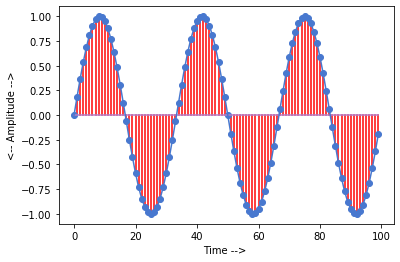

In [62]:
sampling_rate = 100
freq = 3
x = np.arange(sampling_rate) #samples
print(x)
# store amplitudes into a list called y1
y1 = np.sin(2 * np.pi * freq * (x / sampling_rate))
plt.figure()
plt.stem(x, y1, 'r', )
plt.plot(x,y1)
plt.xlabel("Time --> ")
plt.ylabel("<-- Amplitude -->")
plt.show()


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


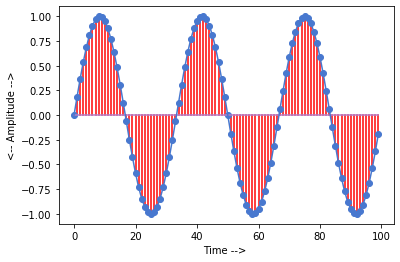

In [63]:
sampling_rate = 100
freq = 11
x = np.arange(sampling_rate) #samples
print(x)
# store amplitudes into a list called y1
y2 = 2 * np.sin(2 * np.pi * freq * (x / sampling_rate))
plt.figure()
plt.stem(x, y1, 'r', )
plt.plot(x,y1)
plt.xlabel("Time --> ")
plt.ylabel("<-- Amplitude -->")
plt.show()


In [64]:
y3 = y1 + y2

In [45]:
import scipy

In [73]:
def FFT_plot (audio, sampling_rate):
    n = len(audio)
    T = 1/ sampling_rate
    yf = scipy.fft(audio)
    xf = np.linspace(0.0, 1.0 / (2.0 * T) , n / 2)
    #print(1.0 / (2.0 * T))
    #plt.figure(figsize=(20, 5))
    plt.rcParams["figure.figsize"] = [16,9]
    fig, ax = plt.subplots()
    ax.plot(xf, 2.0 / n * np.abs(yf[:n//2]))
    plt.grid()
    #
    #plt.rcParams["figure.figsize"] = [16,9]

    plt.xlabel("Frequency -->")
    plt.ylabel("Magnitude")
    return plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


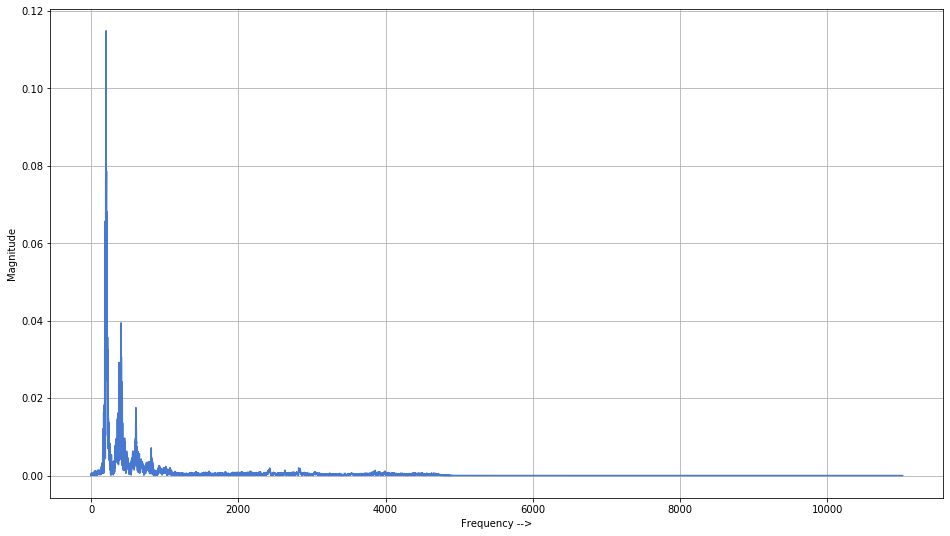

In [74]:
audio_path_9 = str(folder)+"\\audio_9.wav"
y , sr = librosa.load(audio_path_9)
FFT_plot(y,sr)

#we have plotted the frequencies for our sine wave using the above fft_plot function
#Magnitudes of frequency values > 2000 are very small as most of these frequencies are probably due to the noise.

In [76]:
#We got frequencies But where is the Time information?

### Spectogram

- Visual representation of frequencies of a given signal with time is called Spectrogram

- when we applied FFT to our signal, it gave us only frequency values and we lost the track of time information.
- Now our system won’t be able to tell what was spoken first if we use these frequencies as features
- We need to find a different way to calculate features for our system such that it has frequency values along with the time at which they were observed. Here Spectrograms come into the picture

### How to create spectogram
- Idea is to break the audio signal into smaller frames(windows) and calculate DFT (or FFT) for each window.

In [94]:
def spectrogram(samples, sample_rate, stride_ms = 10.0, 
                          window_ms = 20.0, max_freq = None , eps = 1e-14):

    stride_size = int(0.001 * sample_rate * stride_ms)
    window_size = int(0.001 * sample_rate * window_ms)

    # Extract strided windows
    truncate_size = (len(samples) - window_size) % stride_size
    samples = samples[:len(samples) - truncate_size]
    nshape = (window_size, (len(samples) - window_size) // stride_size + 1)
    nstrides = (samples.strides[0], samples.strides[0] * stride_size)
    windows = np.lib.stride_tricks.as_strided(samples, 
                                          shape = nshape, strides = nstrides)
    
    assert np.all(windows[:, 1] == samples[stride_size:(stride_size + window_size)])

    # Window weighting, squared Fast Fourier Transform (fft), scaling
    weighting = np.hanning(window_size)[:, None]
    
    fft = np.fft.rfft(windows * weighting, axis=0)
    fft = np.absolute(fft)
    fft = fft**2
    
    scale = np.sum(weighting**2) * sample_rate
    fft[1:-1, :] *= (2.0 / scale)
    fft[(0, -1), :] /= scale
    
    # Prepare fft frequency list
    freqs = float(sample_rate) / window_size * np.arange(fft.shape[0])
    
    # Compute spectrogram feature
    ind = np.where(freqs <= max_freq)[0][-1] + 1
    specgram = np.log(fft[:ind, :] + eps)
    return specgram

In [95]:
audio_path_9 = str(folder)+"\\audio_9.wav"
y , sr = librosa.load(audio_path_9)
print(len(y))
print(sr)
spectrogram(y,sr)

24311
22050


IndexError: index -1 is out of bounds for axis 0 with size 0

#### Frequency Space: Fast Fourier Transformation
- maps the given time space into this frequency space and is valid for audio data
- Complex numbers are necessary because Fourier transformations actually deliver two values: the intensity of occurring frequencies and the phase shifts.

#### Correlation Space
- The frequency space expresses a sort of correlation betweenvalues in terms of frequencies. For some features it would be more appropriate to express the correlation in terms of time dependencies. Therefore, the transformation into another space is used.

- Transforming audio data into the correlation space eases the recognition of the speed of the music, measured in beats per minute

#### Reconstruction of state space
- Nonlinear dynamic systems can be described with the aid of non-linear differential equations. The number of variables which must be known to completely describe the behavior of such a system corresponds to the dimension of this system. These variables are called state variables.

- The state space emphasizes characteristics which can hardly be seen in the original space. Since the state variables are often unknown, a topologically equivalent space is constructed (Takens, 1980). This is known as reconstruction of state space.

- Within the phase space, several features can be extracted, e.g., the angles between vectors. Small variances of angles indicate smooth changes of the state variables, large variances harsh changes. This is a dominant feature when separating classic from the more percussive pop music

#### Reversibility
- to detect intervals in different dimensions of a value series

- Basis transformations most often are reversible, because only the basis, not the position of the elements is changed. In contrast, if intervals in the index dimension are used, the transformation is not reversible.









